In [4]:
%pip install Adam

ERROR: Operation cancelled by user


In [6]:
def extract_last_two_and_convert_to_int(value):
    # Extract last 2 characters
    last_two = value[-2:]
    # Convert to int
    return int(last_two)

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import shutil


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dropout, Activation, Flatten, Dense

from  tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from keras import backend as k
import tensorflow as tf

In [39]:
data1 = pd.read_csv("eeg_data_S2_nomatch.csv")

In [40]:
data1 = data1.dropna()
data1['Subject_ID'] = data1['Subject_ID'].apply(extract_last_two_and_convert_to_int)
X = data1.drop(['Sensor', 'Sample', 'Matching_Condition', 'Trial', 'Alcoholic'], axis=1)
data1['Alcoholic'] = data1['Alcoholic'].astype(int)
y = data1['Alcoholic']

# Split the data into training and testing sets
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(X_train_no,y_train_no)

# predict the target on the train dataset
predict_train_no = model.predict(X_train_no)
print('\nTarget on train data',predict_train_no)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train_no,predict_train_no)
print('\naccuracy_score on train dataset : ', accuracy_train)
y_pred_no = model.predict(X_test_no)
accuracy = accuracy_score(y_test_no, y_pred_no)
print("Accuracy:", accuracy)


Target on train data [0 1 1 ... 0 0 0]

accuracy_score on train dataset :  0.9514436258732089
Accuracy: 0.9508478132331344



Accuracy Score on test dataset :  0.9375917908028


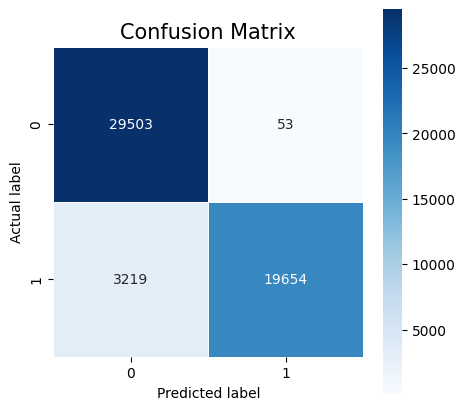


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     29556
           1       1.00      0.86      0.92     22873

    accuracy                           0.94     52429
   macro avg       0.95      0.93      0.94     52429
weighted avg       0.94      0.94      0.94     52429



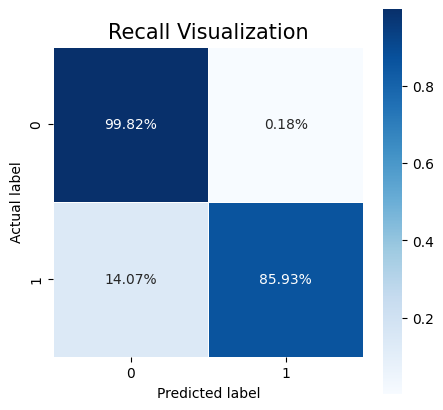

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the target on the test dataset
predict_test = model.predict(X_test_no)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test_no, predict_test)
print('\nAccuracy Score on test dataset : ', accuracy_test)

# Confusion Matrix on test dataset
cm = confusion_matrix(y_test_no, predict_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

# Classification Report on test dataset
print("\nClassification Report:")
print(classification_report(y_test_no, predict_test))

# Recall Visualization
plt.figure(figsize=(5,5))
sns.heatmap(cm/cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Recall Visualization', size = 15)
plt.show()

In [42]:
data = pd.read_csv("eeg_data_S2_match.csv")

In [43]:
data = data.dropna()
data['Subject_ID'] = data['Subject_ID'].apply(extract_last_two_and_convert_to_int)
X = data.drop(['Sensor', 'Sample', 'Matching_Condition', 'Trial', 'Alcoholic'], axis=1)
data['Alcoholic'] = data['Alcoholic'].astype(int)
y = data['Alcoholic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Target on train data [0 1 1 ... 0 0 0]

accuracy_score on train dataset :  0.9204391763016806
Accuracy: 0.9182133444305729



Accuracy Score on test dataset :  0.9182133444305729


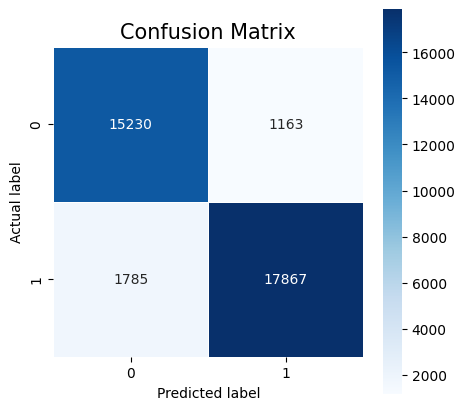


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     16393
           1       0.94      0.91      0.92     19652

    accuracy                           0.92     36045
   macro avg       0.92      0.92      0.92     36045
weighted avg       0.92      0.92      0.92     36045



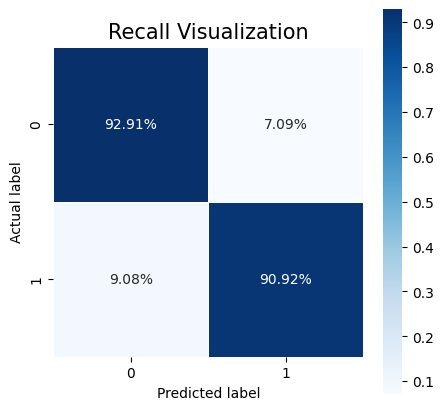

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test, predict_test)
print('\nAccuracy Score on test dataset : ', accuracy_test)

# Confusion Matrix on test dataset
cm = confusion_matrix(y_test, predict_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size = 15)
plt.show()

# Classification Report on test dataset
print("\nClassification Report:")
print(classification_report(y_test, predict_test))

# Recall Visualization
plt.figure(figsize=(5,5))
sns.heatmap(cm/cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2%", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Recall Visualization', size = 15)
plt.show()


In [31]:
dataframe = pd.read_csv("eeg_data_S2_match.csv")

In [32]:
from sklearn.naive_bayes import GaussianNB
dataframe['Subject_ID'] = dataframe['Subject_ID'].apply(extract_last_two_and_convert_to_int)
X = dataframe.drop(['Sensor', 'Sample', 'Matching_Condition', 'Trial', 'Alcoholic'], axis=1)
dataframe['Alcoholic'] = dataframe['Alcoholic'].astype(int)
y = dataframe['Alcoholic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
# Calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Target on train data [1 1 1 ... 0 0 0]

accuracy_score on train dataset :  0.742015133965418
Accuracy: 0.7459564433347204


In [46]:
dataframe1 = pd.read_csv("eeg_data_S2_nomatch.csv")

In [47]:
from sklearn.naive_bayes import GaussianNB
dataframe1['Subject_ID'] = dataframe1['Subject_ID'].apply(extract_last_two_and_convert_to_int)
X = dataframe1.drop(['Sensor', 'Sample', 'Matching_Condition', 'Trial', 'Alcoholic'], axis=1)
dataframe1['Alcoholic'] = dataframe1['Alcoholic'].astype(int)
y = dataframe1['Alcoholic']

# Split the data into training and testing sets
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()

# Model training
model.fit(X_train_no, y_train_no)
predict_train_no = model.predict(X_train_no)
print('\nTarget on train data',predict_train_no)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train_no,predict_train_no)
print('\naccuracy_score on train dataset : ', accuracy_train)
y_pred_no = model.predict(X_test_no)
accuracy = accuracy_score(y_test_no, y_pred_no)
print("Accuracy:", accuracy)


Target on train data [0 0 1 ... 0 0 0]

accuracy_score on train dataset :  0.9360322342226355
Accuracy: 0.9375917908028


NameError: name 'test_data_dir' is not defined